<a href="https://colab.research.google.com/github/maryandy2002/maryandy2002/blob/main/Grafos_Segundo_Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Algoritmo de Kruskal**

---



In [37]:
def buscar(v,raiz):
  if raiz[v]!=v:
    raiz[v]=raiz[raiz[v]]
    v=raiz[v]
  return v

def unir(v1, v2, raiz):
    r1 = buscar(v1, raiz)
    r2 = buscar(v2, raiz)
    if r1 != r2:
        raiz[r2] = r1
        return True
    return False

def kruskal(v,e,n):
  raiz = {x: x for x in v} #identificar componentes y evitar ciclos

  Tk=[]

  for arista in e:
      v1, v2 = arista[0]
      if unir(v1, v2, raiz):
        Tk.append(arista)
      if len(Tk) == n - 1:
        break
  return Tk

#**Algoritmo de Prim**
---

In [61]:
def prim(v,e,n):
  Tp=[]
  vp=[v[n-1]]
  while len(Tp)<(n-1):
    for i in range(len(e)):
      if (e[i][0][0] in vp) ^ (e[i][0][1] in vp):
        if e[i][0][0] in vp:
          vp.append(e[i][0][1])
        else:
          vp.append(e[i][0][0])
        Tp.append(e[i])
        break
  return Tp

#**Gráfica**
---


In [39]:
import networkx as nx
import matplotlib.pyplot as plt

def graficar(v,e,Tk,txt):
  # Crear el grafo completo
  G = nx.Graph()
  for vertice in v:
    G.add_node(vertice)

  for arista, peso in e:
    G.add_edge(arista[0], arista[1], weight=peso)

  # Crear un grafo solo con las aristas del MST
  T = nx.Graph()
  for arista, peso in Tk:
      T.add_edge(arista[0], arista[1], weight=peso)

  # Posición fija para que los dos grafos se alineen
  pos = nx.spring_layout(G, seed=1)

  # Dibujar grafo completo
  nx.draw(G, pos, with_labels=True, node_color='lightgray', node_size=800, edge_color='lightgray')
  nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

  # Dibujar el árbol generador mínimo sobrepuesto
  nx.draw(T, pos, with_labels=False, node_color='pink', node_size=800, edge_color='purple', width=2)
  nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

  plt.title(txt)
  plt.show()

#**Leer grafo**
---

In [54]:
n=int(input("¿Cuál es el orden del grafo? "))
m=int(input("¿Cuál es el tamaño del grafo? "))

v=[]
e=[]

for i in range(n):
  v.append(chr(ord('A')+i))

print("Éstos son los vértices del grafo ",v)

for i in range(m):
  v1,v2=input("Ingrese los vértices incidentes a la arista "+str(i)+": ").split()
  w=int(input("Ingrese el peso de la arista "+str(i)+": "))
  e.append(([v1,v2],w))

#ordenar la lista con
e.sort(key=lambda x:x[1])


¿Cuál es el orden del grafo? 13
¿Cuál es el tamaño del grafo? 22
Éstos son los vértices del grafo  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M']
Ingrese los vértices incidentes a la arista 0: A B
Ingrese el peso de la arista 0: 27
Ingrese los vértices incidentes a la arista 1: B C
Ingrese el peso de la arista 1: 21
Ingrese los vértices incidentes a la arista 2: C D
Ingrese el peso de la arista 2: 29
Ingrese los vértices incidentes a la arista 3: A D
Ingrese el peso de la arista 3: 75
Ingrese los vértices incidentes a la arista 4: A M
Ingrese el peso de la arista 4: 14
Ingrese los vértices incidentes a la arista 5: B M
Ingrese el peso de la arista 5: 16
Ingrese los vértices incidentes a la arista 6: C M
Ingrese el peso de la arista 6: 13
Ingrese los vértices incidentes a la arista 7: D M
Ingrese el peso de la arista 7: 12
Ingrese los vértices incidentes a la arista 8: A E
Ingrese el peso de la arista 8: 87
Ingrese los vértices incidentes a la arista 9: B F
Ingrese el

---

#**Características del árbol generador mínimo Prim**
---

In [62]:
w=sum(peso for (_, peso) in prim(v,e,n))
print("La cantidad de cableado mínimo que se requiere es de ",w," metros")
print("La longitud del árbol de expansion mínimo es de ",len(prim(v,e,n))," aristas")


La cantidad de cableado mínimo que se requiere es de  391  metros
La longitud del árbol de expansion mínimo es de  12  aristas


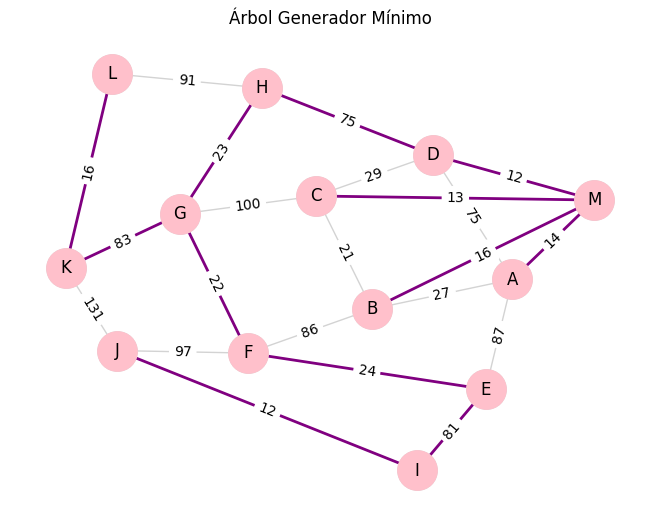

In [63]:
graficar(v,e,prim(v,e,n),"Árbol Generador Mínimo")


#**Características del árbol generador mínimo Kruskal**
---

In [64]:
T=kruskal(v,e,n)
print("La séptima arista que se agrego al árbol de expansión es ",T[6][0][0],"---",T[6][0][1]," y su peso es ",T[6][1])
print("La octava arista que se agrego al árbol de expansión es ",T[7][0][0],"---",T[7][0][1]," y su peso es ",T[7][1])

La séptima arista que se agrego al árbol de expansión es  F --- G  y su peso es  22
La octava arista que se agrego al árbol de expansión es  G --- H  y su peso es  23
